# FRAUD DETECTION
##### We will build a classifications model using a dataset in which data is highly imbalanced. Different techniques will be used to mitigate the problem of imbalanced data 

In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from collections import Counter

In [6]:
os.chdir(r'D:\Work\Kaggle\creditcardfraud')
glob.glob('*.csv')

['creditcard.csv']

In [7]:
#Read in data
data = pd.read_csv('creditcard.csv')

In [8]:
data.info() # No Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

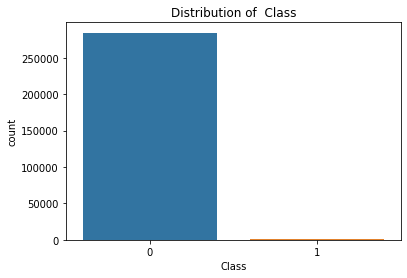

In [12]:
#Plot the target varaible
sns.countplot(data['Class'])
plt.title('Distribution of  Class')
plt.show()

In [26]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
y = data['Class']
X = data.drop('Class', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(213605, 30)
(213605,)
(71202, 30)
(71202,)


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression(max_iter=300, random_state=42)
lr.fit(X_train, y_train)
pred_tr = lr.predict(X_train)
pred_ts = lr.predict(X_test)
tra = float(roc_auc_score(y_train, pred_tr))
tsa = float(roc_auc_score(y_test, pred_ts))
print('Train Score: {}'.format(roc_auc_score(y_train, pred_tr)))
print('Test Score: {}'.format(roc_auc_score(y_test, pred_ts)))

Train Score: 0.81917210638819
Test Score: 0.7742237481944918


### We clearly see that the data is unbalanced. We would use the following techniques:
##### 1) Down Sampling
##### 2) Up Sampling
##### 3) SMOTETomek

### Down Sampling

In [78]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_s, y_s = nm.fit_sample(X,y)
print('Original Data : {}'.format(Counter(y)))
print('Under Sampled Data : {}'.format(Counter(y_s)))
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.25, random_state=42)
print(Xs_train.shape)
print(ys_train.shape)
print(Xs_test.shape)
print(ys_test.shape)

Original Data : Counter({0: 284315, 1: 492})
Under Sampled Data : Counter({0: 492, 1: 492})
(738, 30)
(738,)
(246, 30)
(246,)


In [88]:
lr1 = LogisticRegression(max_iter=300, random_state=42)
lr1.fit(Xs_train, ys_train)
pred_tr_us = lr1.predict(Xs_train)
pred_ts_us = lr1.predict(Xs_test)
traus = float(roc_auc_score(ys_train, pred_tr_us))
tsaus = float(roc_auc_score(ys_test, pred_ts_us))
print('Train Score: {}'.format(roc_auc_score(ys_train, pred_tr_us)))
print('Test Score: {}'.format(roc_auc_score(ys_test, pred_ts_us)))

Train Score: 0.9635554380398379
Test Score: 0.9547619047619047


###### The model on undersampled seems to perform better with better variance between train and test
### Up Sampling

In [82]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X,y)
print('Original Data : {}'.format(Counter(y)))
print('Under Sampled Data : {}'.format(Counter(y_ros)))
Xros_train, Xros_test, yros_train, yros_test = train_test_split(X_ros, y_ros, test_size=0.25, random_state=42)
print(Xros_train.shape)
print(yros_train.shape)
print(Xros_test.shape)
print(yros_test.shape)

Original Data : Counter({0: 284315, 1: 492})
Under Sampled Data : Counter({0: 284315, 1: 284315})
(426472, 30)
(426472,)
(142158, 30)
(142158,)


In [83]:
lr2 = LogisticRegression(max_iter=300, random_state=42)
lr2.fit(Xros_train, yros_train)
pred_tr_ros = lr2.predict(Xros_train)
pred_ts_ros = lr2.predict(Xros_test)
traros = float(roc_auc_score(yros_train, pred_tr_ros))
tsaros = float(roc_auc_score(yros_test, pred_ts_ros))
print('Train Score: {}'.format(roc_auc_score(yros_train, pred_tr_ros)))
print('Test Score: {}'.format(roc_auc_score(yros_test, pred_ts_ros)))

Train Score: 0.9170042271875795
Test Score: 0.9172914062319131


### SMOTETomek

In [84]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_smk, y_smk = smk.fit_sample(X,y)
print('Original Data : {}'.format(Counter(y)))
print('Under Sampled Data : {}'.format(Counter(y_smk)))
Xsmk_train, Xsmk_test, ysmk_train, ysmk_test = train_test_split(X_smk, y_smk, test_size=0.25, random_state=42)
print(Xsmk_train.shape)
print(ysmk_train.shape)
print(Xsmk_test.shape)
print(ysmk_test.shape)

Original Data : Counter({0: 284315, 1: 492})
Under Sampled Data : Counter({0: 283781, 1: 283781})
(425671, 30)
(425671,)
(141891, 30)
(141891,)


In [85]:
lr3 = LogisticRegression(max_iter=300, random_state=42)
lr3.fit(Xsmk_train, ysmk_train)
pred_tr_smk = lr3.predict(Xsmk_train)
pred_ts_smk = lr3.predict(Xsmk_test)
trasmk = float(roc_auc_score(ysmk_train, pred_tr_smk))
tsasmk = float(roc_auc_score(ysmk_test, pred_ts_smk))
print('Train Score: {}'.format(roc_auc_score(ysmk_train, pred_tr_smk)))
print('Test Score: {}'.format(roc_auc_score(ysmk_test, pred_ts_smk)))

Train Score: 0.9737386745200993
Test Score: 0.9743440214258611


In [68]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Visulization
##### We will compare the results of logistic regression model using different sampling techniques

Text(0.5, 0.98, 'Logistic Regression Model Accuracy')

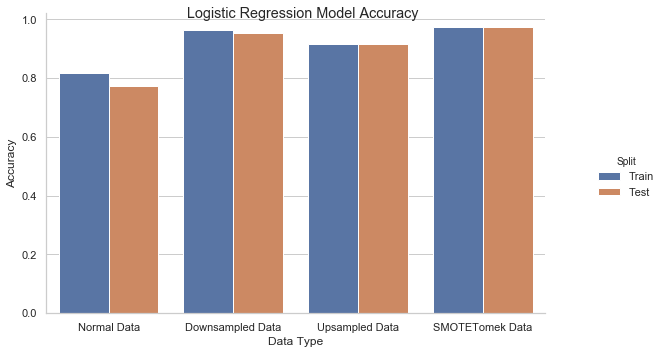

In [135]:
viz_df = pd.DataFrame({'Accuracy': [tra,tsa,traus,tsaus,traros,tsaros,trasmk,tsasmk],
                       'Split': ['Train','Test','Train','Test','Train','Test','Train','Test'],
                       'Data Type': ['Normal Data','Normal Data','Downsampled Data','Downsampled Data',
                                     'Upsampled Data','Upsampled Data', 'SMOTETomek Data','SMOTETomek Data']})
sns.set(style="whitegrid")
g = sns.catplot(x='Data Type', y='Accuracy', hue='Split', data=viz_df, kind='bar')
g.fig.set_figwidth(10)
g.fig.set_figheight(5)
g.fig.suptitle('Logistic Regression Model Accuracy')